In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [57]:
df=pd.read_csv(r"C:\Users\dhruv\Downloads\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

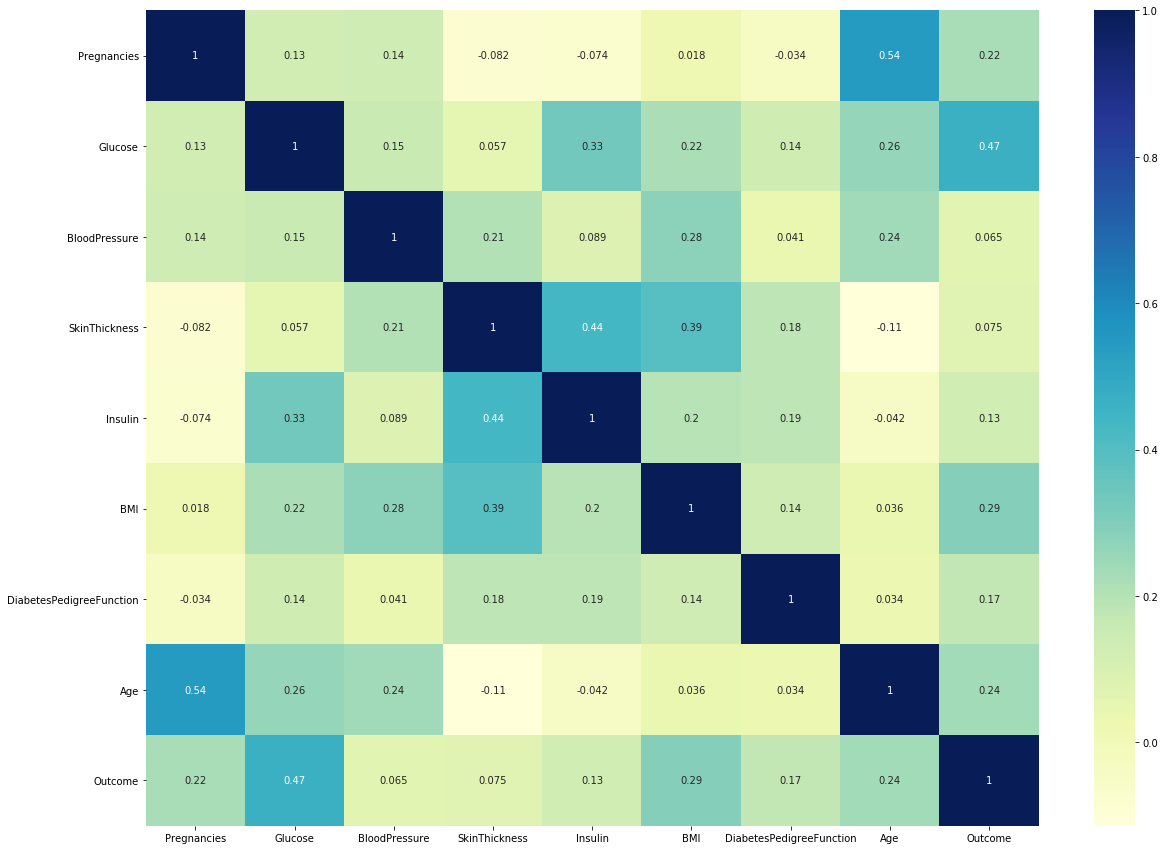

In [5]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [139]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [140]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
mod0=LogisticRegression()
mod0.fit(x_train,y_train)
y_pred=mod0.predict(x_test)

In [14]:
result_lr=accuracy_score(y_test,y_pred)
result_lr

0.7835497835497836

In [21]:
from sklearn.feature_selection import f_regression
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
X_train_fs = fs.transform(x_train)

Feature 0: 19.829600
Feature 1: 136.265496
Feature 2: 0.004516
Feature 3: 1.531933
Feature 4: 11.486265
Feature 5: 47.734661
Feature 6: 11.697387
Feature 7: 27.232166


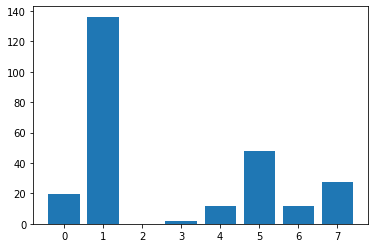

In [22]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [26]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [34]:
bf=SelectKBest(score_func=chi2,k=7)
fit=bf.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feats','Score']  #naming the dataframe columns
print(featureScores.nlargest(7,'Score'))  #print 10 best features

           Feats        Score
4        Insulin  2175.565273
1        Glucose  1411.887041
7            Age   181.303689
5            BMI   127.669343
0    Pregnancies   111.519691
3  SkinThickness    53.108040
2  BloodPressure    17.605373


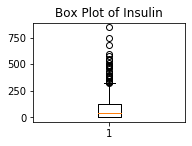

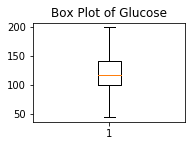

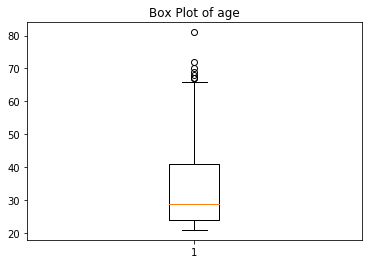

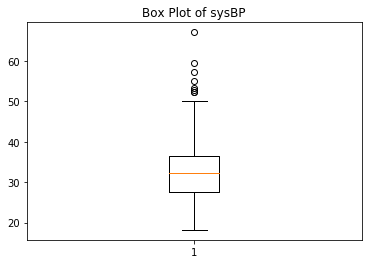

In [53]:
plt.subplot(2,2,1)
plt.boxplot(df['Insulin'])
plt.title('Box Plot of Insulin')
plt.show()
plt.subplot(2,2,2)
plt.boxplot(df['Glucose'])
plt.title('Box Plot of Glucose')
plt.show()
#plt.subplot(2,2,3)
plt.boxplot(df['Age'])
plt.title('Box Plot of age')
plt.show()
#plt.subplot(2,2,4)
plt.boxplot(df['BMI'])
plt.title('Box Plot of sysBP')
plt.show()

In [40]:
def outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [52]:
cols=["BMI","Glucose","Age"]
for i in cols:
    lowerbound,upperbound = outlier(df[i])
    df.drop(df[ (df[i] < lowerbound) ].index , inplace=True)

In [58]:
x=df[['Pregnancies', 'Glucose', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=df['Outcome']

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
mod0=LogisticRegression()
mod0.fit(x_train,y_train)
y_pred=mod0.predict(x_test)

In [60]:
result_lr=accuracy_score(y_test,y_pred)
result_lr

0.7748917748917749

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
n_list=[50,100,130,170,200]
for i in n_list:
    rf=RandomForestClassifier(n_estimators=i, criterion="gini", oob_score=True)
    rf.fit(x_train,y_train)
    print("Trees: ", i)
    print("Accuracy score (test): ",(rf.score(x_test, y_test)))
    

Trees:  50
Accuracy score (test):  0.8138528138528138
Trees:  100
Accuracy score (test):  0.7878787878787878
Trees:  130
Accuracy score (test):  0.7835497835497836
Trees:  170
Accuracy score (test):  0.7922077922077922
Trees:  200
Accuracy score (test):  0.8008658008658008


In [142]:
#creating model based on training dataset
rf01  = RandomForestClassifier(n_estimators=50 , criterion="gini", oob_score=True)
rf01.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [143]:
#getting predictions for training dataset
pred_rf01_test = rf01.predict(x_test)
#calculating accuracy
result_rf = accuracy_score(y_test, pred_rf01_test)
print("The accuracy of model rf02 for test dataset is: ", result_rf*100)

The accuracy of model rf02 for test dataset is:  79.65367965367966


In [144]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [66]:
#we now define the range of parameters to be grid tested
params_grid = {'C' : [0.1, 1, 10, 100, 1000],
               'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
               'kernel' : ['rbf']}

In [67]:
#initiating the grid search
grid_search = GridSearchCV(SVC(), params_grid, refit=True, verbose=3)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.657, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.657, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.654, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.664, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.664, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.657, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.657, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.654, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.664, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.664, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.657, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.657, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.776, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.720, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.757, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.657, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.657, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.654, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.664, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [68]:
#getting the best parameters
print(grid_search.best_params_)

#getting details about model after hyper_parameter tuning
print(grid_search.best_estimator_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [145]:
svm=SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [146]:
svm.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [147]:
#getting predictions
pred_svm_02 = svm.predict(x_test)
#getting classification report and accuracy
print(classification_report(y_test, pred_svm_02))
result_svm = accuracy_score(y_test, pred_svm_02)
print("The accuracy of model svm_02 is: ", result_svm*100)

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       146
           1       0.76      0.49      0.60        85

    accuracy                           0.76       231
   macro avg       0.76      0.70      0.71       231
weighted avg       0.76      0.76      0.74       231

The accuracy of model svm_02 is:  75.75757575757575


In [148]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1)

In [78]:
search.fit(x_train,y_train)
search.best_params_

{'learning_rate': 0.01, 'n_estimators': 2000, 'random_state': 1}

In [149]:
ada2=AdaBoostClassifier(learning_rate= 0.01, n_estimators= 2000, random_state=1)

In [150]:
ada2.fit(x_train,y_train)
ab_pred=ada2.predict(x_test)
result_ab=accuracy_score(y_test,ab_pred)
result_ab

0.7922077922077922

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
#Trying out different learning rates for the classifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

In [97]:
for learning_rate in lr_list:
    model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    model_gb.fit(x_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): ",(model_gb.score(x_train, y_train)))
    print("Accuracy score (test): ",(model_gb.score(x_test, y_test)))

Learning rate:  0.05
Accuracy score (training):  0.819366852886406
Accuracy score (test):  0.7965367965367965
Learning rate:  0.075
Accuracy score (training):  0.8286778398510242
Accuracy score (test):  0.7965367965367965
Learning rate:  0.1
Accuracy score (training):  0.8435754189944135
Accuracy score (test):  0.8051948051948052
Learning rate:  0.25
Accuracy score (training):  0.8789571694599627
Accuracy score (test):  0.7965367965367965
Learning rate:  0.5
Accuracy score (training):  0.9459962756052142
Accuracy score (test):  0.8051948051948052
Learning rate:  0.75
Accuracy score (training):  0.9720670391061452
Accuracy score (test):  0.7748917748917749
Learning rate:  1
Accuracy score (training):  0.9851024208566108
Accuracy score (test):  0.7532467532467533


In [151]:
mod_gb=GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
mod_gb.fit(x_train,y_train)
pred_gb=mod_gb.predict(x_test)
result_GB=accuracy_score(y_test,pred_gb)
print("The accuracy of mod_gb is: ", result_GB*100)


The accuracy of mod_gb is:  76.62337662337663


In [100]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [152]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=20,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [153]:
xgb1.fit(x_train,y_train)
xgb_pred = xgb1.predict(x_test)
result_xgb=accuracy_score(y_test,xgb_pred)
result_xgb


0.7705627705627706

In [154]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       146
           1       0.73      0.60      0.66        85

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



In [155]:
from sklearn.ensemble import VotingClassifier

In [156]:
modVC = VotingClassifier(estimators=[('lr', mod0), ('rf', rf01),("ab",ada2),("gb",mod_gb),('xg',xgb1)], voting='soft')

In [157]:
modVC.fit(x_train,y_train)
pred_vc=modVC.predict(x_test)
result_vc=accuracy_score(y_test,y_pred)
result_vc

0.7835497835497836

In [158]:
print(classification_report(y_test,pred_vc))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       146
           1       0.81      0.65      0.72        85

    accuracy                           0.81       231
   macro avg       0.81      0.78      0.79       231
weighted avg       0.81      0.81      0.81       231

